In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of the grid shell

grid shells with various span (L), grid density (gN), and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analysis

In [4]:
Span   = 40  # m span of two-member structure
Height = 5   # m height at apex
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam
Span/Height

8.0

In [5]:
n=7 # mm CHS cross-section diameter
DStart=150
DStep=50
m=2 # mm CHS cross-section thickness
tStart=5
tStep=5
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))

D:  [150 200 250 300 350 400 450]
t:  [ 5 10]


In [6]:
GRS = tp.GridShell(Span,Height,DStart,tStart,gN,nb)
tk.CreateGeom(GRS)
tk.EqProperties(GRS)
GRS2 = tp.GridShell(Span,Height,DStart,tStart,20,nb)
tk.CreateGeom(GRS2)
tk.EqProperties(GRS2)
GRS3 = tp.GridShell(Span,Height,DStart,tStart,24,nb)
tk.CreateGeom(GRS3)
tk.EqProperties(GRS3)

2.0662059294871799e-06

# Load

In [7]:
with pd.HDFStore(mainpath+'/Saved results/NLin_O_k.h5') as store:
    CapacityF=store['CapacityF']
    Capacity=store['Capacity']
    Mmax=store['Mmax']
    Nmin=store['Nmin']    
    Nmax=store['Nmax']
    Dmax=store['Dmax']
    rhoA=store['rhoA']
    eqBA=store['eqBA']
    eqTA=store['eqTA']
    EA=store['EA']
    TA=store['TA']
    DA=store['DA']
    tA=store['tA']
    AA=store['AA']
    rhoA2=store['rhoA2']
    CapacityF2=store['CapacityF2']
    Capacity2=store['Capacity2']
    Mmax2=store['Mmax2']
    Nmin2=store['Nmin2']
    Nmax2=store['Nmax2']
    Dmax2=store['Dmax2']
    rhoA3=store['rhoA3']
    CapacityF3=store['CapacityF3']
    Capacity3=store['Capacity3']
    Mmax3=store['Mmax3']
    Nmin3=store['Nmin3']
    Nmax3=store['Nmax3']
    Dmax3=store['Dmax3']

In [8]:
# Load data for case without horizontal supports
with pd.HDFStore(mainpath+'/Saved results/OM_k.h5') as store:
    r1OM = store['r1OM'].values
    f1OM = store['f1OM'].values
    r2OM = store['r2OM'].values
    f2OM = store['f2OM'].values
    r3OM = store['r3OM'].values
    f3OM = store['f3OM'].values
    r4OM = store['r4OM'].values
    f4OM = store['f4OM'].values
    r5OM = store['r5OM'].values
    f5OM = store['f5OM'].values
    r6OM = store['r6OM'].values
    f6OM = store['f6OM'].values

# Analysis

In [6]:
Fz = -600.; #kN
MatNL = True

In [14]:
nm=n*m
CapacityF=np.zeros(nm)
Capacity=np.zeros(nm)
Mmax=np.zeros(nm)
Nmin=np.zeros(nm)
Nmax=np.zeros(nm)
Dmax=np.zeros(nm)
rhoA=np.zeros(nm)
eqBA = np.zeros(nm)
eqTA = np.zeros(nm)
EA = np.zeros(nm)
TA = np.zeros(nm)
DA = np.zeros(nm)
tA = np.zeros(nm)
AA = np.zeros(nm)
rhoA2=np.zeros(nm)
CapacityF2=np.zeros(nm)
Capacity2=np.zeros(nm)
Mmax2=np.zeros(nm)
Nmin2=np.zeros(nm)
Nmax2=np.zeros(nm)
Dmax2=np.zeros(nm)
rhoA3=np.zeros(nm)
CapacityF3=np.zeros(nm)
Capacity3=np.zeros(nm)
Mmax3=np.zeros(nm)
Nmin3=np.zeros(nm)
Nmax3=np.zeros(nm)
Dmax3=np.zeros(nm)

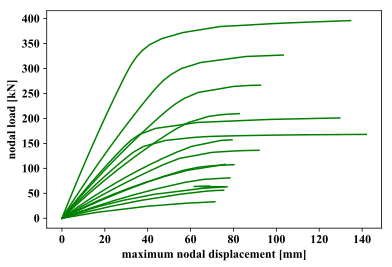

In [16]:
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        DA[k]=D
        t=tStart+tStep*j
        tA[k]=t
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=1 #oldalnyomasos
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        disp, force, ID, loadA, ok = tk.Analyze(GRS, Fz, 1, 0)
        if ok:
            CapacityF[k]=loadA[-1]  #kN
            Capacity[k]=loadA[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            rhoA[k]=tk.EqProperties(GRS)
            Dmax[k],Nmin[k],Nmax[k],Mmax[k],nminid, nmaxid, mid,_=tk.GetResults(disp, force);
            eqBA[k] = GRS.eqB
            eqTA[k] = GRS.eqT
            EA[k] = GRS.Eeq
            TA[k] = GRS.teq
            AA[k] = GRS.secA
            _ = plt.plot(disp[:,ID,2],loadA, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

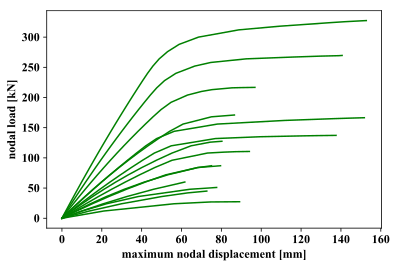

In [18]:
gN=20
#GRS2.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS2 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS2)
        GRS2.SupType=1 #oldalnyomasos
        GRS2.MatNL=MatNL
        tk.BuildOpsModel(GRS2)
        disp2, force2, ID2, loadA2, ok=tk.Analyze(GRS2, Fz, 1, 0)
        if ok:
            rhoA2[k]=tk.EqProperties(GRS2)
            CapacityF2[k]=loadA2[-1]  #kN
            Capacity2[k]=loadA2[-1]*GRS2.nbnBns/GRS2.span**2  #kN/m2
            Dmax2[k],Nmin2[k],Nmax2[k],Mmax2[k],nminid, nmaxid, mid,_=tk.GetResults(disp2, force2);
            _ = plt.plot(disp2[:,ID2,2],loadA2, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

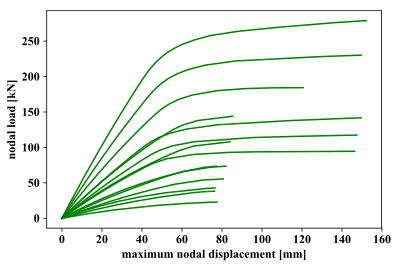

In [20]:
gN=24
Fz = -300.; #kN
#GRS3.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS3 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS3)
        GRS3.SupType=1 #oldalnyomasos
        GRS3.MatNL=MatNL
        tk.BuildOpsModel(GRS3)
        disp3, force3, ID3, loadA3, ok=tk.Analyze(GRS3, Fz, 1, 0)
        if ok:
            rhoA3[k]=tk.EqProperties(GRS3)
            CapacityF3[k]=loadA3[-1]  #kN
            Capacity3[k]=loadA3[-1]*GRS3.nbnBns/GRS3.span**2  #kN/m2
            Dmax3[k],Nmin3[k],Nmax3[k],Mmax3[k],nminid, nmaxid, mid,_=tk.GetResults(disp3, force3);
            _ = plt.plot(disp3[:,ID3,2],loadA3, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

# Results

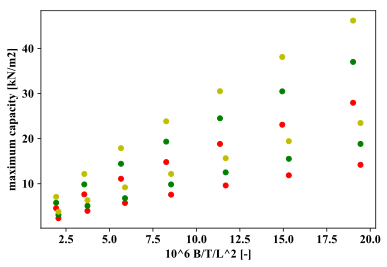

In [11]:
plt.plot(rhoA*1e6,Capacity,'ro', ms=5) # g=16
plt.plot(rhoA2*1e6,Capacity2,'go', ms=5) # g=20
plt.plot(rhoA3*1e6,Capacity3,'yo', ms=5) # g=24
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity [kN/m2]')
plt.show()

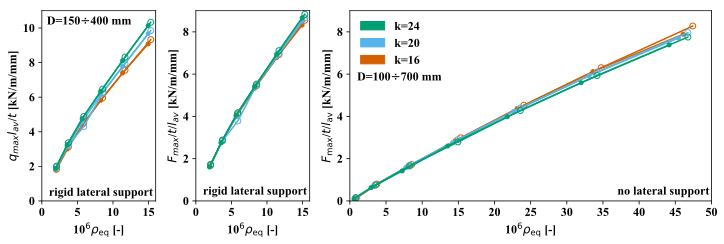

In [12]:
sms = 6
plt.figure(figsize=(12, 3.5))
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

gs = plt.GridSpec(1, 20*5)
sp=6
rrr=int((20*5-2*sp)*16/82)

ax1 = plt.subplot(gs[0,:rrr])
gs.update(hspace=0.0, wspace=0) # set the spacing between axes.

plt.plot(rhoA[:-2:2]*1e6,Capacity[:-2:2]*GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # g=16
plt.plot(rhoA[1:-1:2]*1e6,Capacity[1:-1:2]*GRS.Lav/10,'o-',c=c1, ms=4) # g=20
plt.plot(rhoA2[:-2:2]*1e6,Capacity2[:-2:2]*GRS2.Lav/5,'o-',c=c2, ms=sms,fillStyle='none') # g=24
plt.plot(rhoA2[1:-1:2]*1e6,Capacity2[1:-1:2]*GRS2.Lav/10,'o-',c=c2, ms=4) # g=16
plt.plot(rhoA3[0:-2:2]*1e6,Capacity3[:-2:2]*GRS3.Lav/5,'o-',c=c3, ms=sms,fillStyle='none') # g=20
plt.plot(rhoA3[1:-1:2]*1e6,Capacity3[1:-1:2]*GRS3.Lav/10,'o-',c=c3, ms=4) # g=24
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$q_{max}l_{av}$/$t$ [kN/m/mm]')
plt.xlim(0,16)
plt.ylim(0,11)
plt.xticks(np.arange(0,16.1,5))
plt.yticks(np.arange(0,11.1,2))
ax1.text(1, 0.3, 'rigid lateral support')

b_patch = mpatches.Patch(color=c3, label='k=24')
g_patch = mpatches.Patch(color=c2, label='k=20')
r_patch = mpatches.Patch(color=c1, label='k=16')
t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',fillStyle='none',linestyle='-')
t2_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=10 mm',linestyle='-')
ax1.text(0.7, 10.2, 'D=150$\div$400 mm')

ax2 = plt.subplot(gs[0,rrr+sp:2*rrr+sp])
gs.update(hspace=0.0, wspace=0) # set the spacing between axes.

plt.plot(rhoA[:-2:2]*1e6,CapacityF[:-2:2]/GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # g=16
plt.plot(rhoA[1:-1:2]*1e6,CapacityF[1:-1:2]/GRS.Lav/10,'o-',c=c1, ms=4) # g=20
plt.plot(rhoA2[:-2:2]*1e6,CapacityF2[:-2:2]/GRS2.Lav/5,'o-',c=c2, ms=sms,fillStyle='none') # g=24
plt.plot(rhoA2[1:-1:2]*1e6,CapacityF2[1:-1:2]/GRS2.Lav/10,'o-',c=c2, ms=4) # g=16
plt.plot(rhoA3[0:-2:2]*1e6,CapacityF3[:-2:2]/GRS3.Lav/5,'o-',c=c3, ms=sms,fillStyle='none') # g=20
plt.plot(rhoA3[1:-1:2]*1e6,CapacityF3[1:-1:2]/GRS3.Lav/10,'o-',c=c3, ms=4) # g=24
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{max}$/$t$/$l_{av}$ [kN/m/mm]')
plt.xlim(0,16)
plt.ylim(0,9)
plt.xticks(np.arange(0,16.1,5))
plt.yticks(np.arange(0,9.1,2))
ax2.text(1, 0.3, 'rigid lateral support')

ax3 = plt.subplot(gs[0,2*(rrr+sp):])
plt.plot(r1OM*1e6,f1OM,'o-',c=c1, ms=sms,fillStyle='none') 
plt.plot(r2OM*1e6,f2OM,'o-',c=c1, ms=4) 
plt.plot(r3OM*1e6,f3OM,'o-',c=c2, ms=sms,fillStyle='none') 
plt.plot(r4OM*1e6,f4OM,'o-',c=c2, ms=4) 
plt.plot(r5OM*1e6,f5OM,'o-',c=c3, ms=sms,fillStyle='none')
plt.plot(r6OM*1e6,f6OM,'o-',c=c3, ms=4)  
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylim(0,9)
plt.xlim(0,50)
plt.xticks(np.arange(0,50.1,5))
plt.yticks(np.arange(0,9.1,2))

t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',linestyle='-',fillStyle='none')
t2_dot = mlines.Line2D([], [], color='k', marker='D',markersize=sms, label='t=10 mm',linestyle='-',fillStyle='none')
t3_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=15 mm',linestyle='-')
t4_dot = mlines.Line2D([], [], color='k', marker='D',markersize=3, label='t=20 mm',linestyle='-')
plt.legend(handles=[b_patch,g_patch,r_patch],frameon=False,loc=2)
#plt.legend(handles=[t1_dot , t2_dot, t3_dot, t4_dot],frameon=False,loc=2)

ax3.text(37, 0.3, 'no lateral support')
ax3.text(1, 5.7, 'D=100$\div$700 mm')

plt.savefig('NLinK.pdf', bbox_inches='tight')

plt.show()

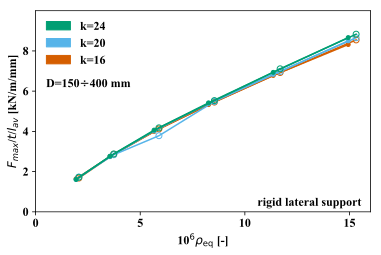

In [13]:
sms = 6
plt.figure(figsize=(6, 3.7))
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

gs = plt.GridSpec(1, 1)
rrr=3*5+1
ax1 = plt.subplot(gs[0,:rrr])
gs.update(hspace=0.0, wspace=0) # set the spacing between axes.

plt.plot(rhoA[:-2:2]*1e6,CapacityF[:-2:2]/GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # g=16
plt.plot(rhoA[1:-1:2]*1e6,CapacityF[1:-1:2]/GRS.Lav/10,'o-',c=c1, ms=4) # g=20
plt.plot(rhoA2[:-2:2]*1e6,CapacityF2[:-2:2]/GRS2.Lav/5,'o-',c=c2, ms=sms,fillStyle='none') # g=24
plt.plot(rhoA2[1:-1:2]*1e6,CapacityF2[1:-1:2]/GRS2.Lav/10,'o-',c=c2, ms=4) # g=16
plt.plot(rhoA3[0:-2:2]*1e6,CapacityF3[:-2:2]/GRS3.Lav/5,'o-',c=c3, ms=sms,fillStyle='none') # g=20
plt.plot(rhoA3[1:-1:2]*1e6,CapacityF3[1:-1:2]/GRS3.Lav/10,'o-',c=c3, ms=4) # g=24
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{max}$/$t$/$l_{av}$ [kN/m/mm]')
plt.xlim(0,16)
plt.ylim(0,10)
plt.xticks(np.arange(0,16.1,5))
plt.yticks(np.arange(0,9.1,2))
ax1.text(10.6, 0.3, 'rigid lateral support')

b_patch = mpatches.Patch(color=c3, label='k=24')
g_patch = mpatches.Patch(color=c2, label='k=20')
r_patch = mpatches.Patch(color=c1, label='k=16')
t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',fillStyle='none',linestyle='-')
t2_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=10 mm',linestyle='-')
ax1.text(0.5, 6.2, 'D=150$\div$400 mm')

t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',linestyle='-',fillStyle='none')
t2_dot = mlines.Line2D([], [], color='k', marker='D',markersize=sms, label='t=10 mm',linestyle='-',fillStyle='none')
t3_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=15 mm',linestyle='-')
t4_dot = mlines.Line2D([], [], color='k', marker='D',markersize=3, label='t=20 mm',linestyle='-')
plt.legend(handles=[b_patch,g_patch,r_patch],frameon=False,loc=2)

plt.savefig('NLinK_r.pdf', bbox_inches='tight')

plt.show()

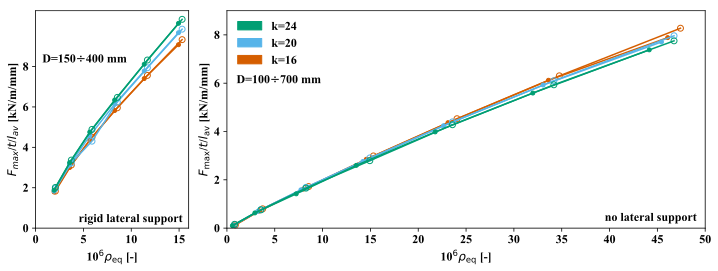

In [14]:
sms = 6
plt.figure(figsize=(12, 4))
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

gs = plt.GridSpec(1, 14*5)
rrr=3*5+1
ax1 = plt.subplot(gs[0,:rrr])
gs.update(hspace=0.0, wspace=0) # set the spacing between axes.

plt.plot(rhoA[:-2:2]*1e6,Capacity[:-2:2]*GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # g=16
plt.plot(rhoA[1:-1:2]*1e6,Capacity[1:-1:2]*GRS.Lav/10,'o-',c=c1, ms=4) # g=20
plt.plot(rhoA2[:-2:2]*1e6,Capacity2[:-2:2]*GRS2.Lav/5,'o-',c=c2, ms=sms,fillStyle='none') # g=24
plt.plot(rhoA2[1:-1:2]*1e6,Capacity2[1:-1:2]*GRS2.Lav/10,'o-',c=c2, ms=4) # g=16
plt.plot(rhoA3[0:-2:2]*1e6,Capacity3[:-2:2]*GRS3.Lav/5,'o-',c=c3, ms=sms,fillStyle='none') # g=20
plt.plot(rhoA3[1:-1:2]*1e6,Capacity3[1:-1:2]*GRS3.Lav/10,'o-',c=c3, ms=4) # g=24
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{max}$/$t$/$l_{av}$ [kN/m/mm]')
plt.xlim(0,16)
#plt.ylim(0,9)
plt.xticks(np.arange(0,16.1,5))
plt.yticks(np.arange(0,9.1,2))
ax1.text(4.5, 0.3, 'rigid lateral support')

b_patch = mpatches.Patch(color=c3, label='k=24')
g_patch = mpatches.Patch(color=c2, label='k=20')
r_patch = mpatches.Patch(color=c1, label='k=16')
t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',fillStyle='none',linestyle='-')
t2_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=10 mm',linestyle='-')
ax1.text(0.7, 8.2, 'D=150$\div$400 mm')

ax2 = plt.subplot(gs[0,rrr+4:])
plt.plot(r1OM*1e6,f1OM,'o-',c=c1, ms=sms,fillStyle='none') 
plt.plot(r2OM*1e6,f2OM,'o-',c=c1, ms=4) 
plt.plot(r3OM*1e6,f3OM,'o-',c=c2, ms=sms,fillStyle='none') 
plt.plot(r4OM*1e6,f4OM,'o-',c=c2, ms=4) 
plt.plot(r5OM*1e6,f5OM,'o-',c=c3, ms=sms,fillStyle='none')
plt.plot(r6OM*1e6,f6OM,'o-',c=c3, ms=4)  
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylim(0,9)
plt.xlim(0,50)
plt.xticks(np.arange(0,50.1,5))
plt.yticks(np.arange(0,9.1,2))

t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',linestyle='-',fillStyle='none')
t2_dot = mlines.Line2D([], [], color='k', marker='D',markersize=sms, label='t=10 mm',linestyle='-',fillStyle='none')
t3_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=15 mm',linestyle='-')
t4_dot = mlines.Line2D([], [], color='k', marker='D',markersize=3, label='t=20 mm',linestyle='-')
plt.legend(handles=[b_patch,g_patch,r_patch],frameon=False,loc=2)
#plt.legend(handles=[t1_dot , t2_dot, t3_dot, t4_dot],frameon=False,loc=2)

ax2.text(39.5, 0.3, 'no lateral support')
ax2.text(1, 6, 'D=100$\div$700 mm')

#plt.savefig('NLinK.pdf', bbox_inches='tight')

plt.show()

# SAVE

In [268]:
df1 = pd.DataFrame(CapacityF)
df2 = pd.DataFrame(Capacity)
df3 = pd.DataFrame(Mmax)
df4 = pd.DataFrame(Nmin)
df5 = pd.DataFrame(Nmax)
df6 = pd.DataFrame(Dmax)
df7 = pd.DataFrame(rhoA)
df8 = pd.DataFrame(eqBA)
df9 = pd.DataFrame(eqTA)
df10 = pd.DataFrame(EA)
df11 = pd.DataFrame(TA)
df12 = pd.DataFrame(DA)
df13 = pd.DataFrame(tA)
df14 = pd.DataFrame(AA)
df15 = pd.DataFrame(rhoA2)
df16 = pd.DataFrame(CapacityF2)
df17 = pd.DataFrame(Capacity2)
df18 = pd.DataFrame(Mmax2)
df19 = pd.DataFrame(Nmin2)
df20 = pd.DataFrame(Nmax2)
df21 = pd.DataFrame(Dmax2)
df22 = pd.DataFrame(rhoA3)
df23 = pd.DataFrame(CapacityF3)
df24 = pd.DataFrame(Capacity3)
df25 = pd.DataFrame(Mmax3)
df26 = pd.DataFrame(Nmin3)
df27 = pd.DataFrame(Nmax3)
df28 = pd.DataFrame(Dmax3)

with pd.HDFStore(mainpath+'/Saved results/NLin_O_k.h5') as store:
    store['CapacityF']=df1
    store['Capacity']=df2
    store['Mmax']=df3
    store['Nmin']=df4
    store['Nmax']=df5
    store['Dmax']=df6
    store['rhoA']=df7
    store['eqBA']=df8
    store['eqTA']=df9
    store['EA']=df10
    store['TA']=df11
    store['DA']=df12
    store['tA']=df13
    store['AA']=df14
    store['rhoA2']=df15
    store['CapacityF2']=df16
    store['Capacity2']=df17
    store['Mmax2']=df18
    store['Nmin2']=df19
    store['Nmax2']=df20
    store['Dmax2']=df21
    store['rhoA3']=df22
    store['CapacityF3']=df23
    store['Capacity3']=df24
    store['Mmax3']=df25
    store['Nmin3']=df26
    store['Nmax3']=df27
    store['Dmax3']=df28